### Question one (a)

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("./2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
#check for missing values, there are no missimg values :)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [5]:
#check payment methods
df["payment_method"].unique()

array(['cash', 'credit_card', 'debit'], dtype=object)

In [6]:
#check statistics of the data
df[["order_amount", "total_items"]].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


from the output, it can be easily noticed that mean value is extremely high compared to others values. The minimum value is 90 while the 25th, 50th, and 75th percentile are 163, 284 and 390 respectively. with 704000 been the maximum value we can assume that extremely large values (outliers) like this are what is overstating the value of the mean.

A boxplot will show a more detailed view of the outliers in the data.

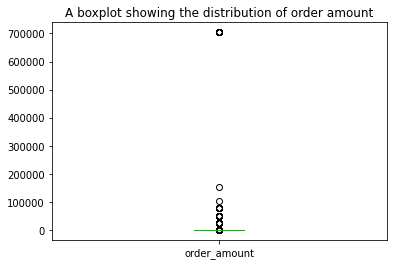

In [7]:
df["order_amount"].plot(kind="box",) 
plt.title("A boxplot showing the distribution of order amount")
plt.show()

The boxplot shows there are alot of outliers, the line seems to be on 0.

In [8]:
orders = df.groupby(["order_amount", "total_items"]).size(
            ).reset_index(name="count").sort_values(by="order_amount", ascending=False)
orders.head(10)

,order_amount,total_items,count
275,704000,2000,17
274,154350,6,1
273,102900,4,1
272,77175,3,9
271,51450,2,16
270,25725,1,19
269,1760,5,1
268,1408,4,2
267,1086,6,1
266,1064,8,1


Digging deep into the data by grouping shows that a number of values are extremely high when compared to the rest of the values. Take a look at 704000 we can see from the table that the items ordered made the amount large because if the amount is divided by the total items it shows that each sneaker cost 352. 

In [9]:
max_order_per_item = df["order_amount"] / df['total_items']

In [10]:
df["max_order_per_item"] = max_order_per_item
df.head()



,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,max_order_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [11]:
order_per_item = df.groupby(["max_order_per_item", "order_amount", "total_items"]).size(
            ).reset_index(name="count").sort_values(by="max_order_per_item", ascending=False)
order_per_item.head(10)

,max_order_per_item,order_amount,total_items,count
275,25725.0,154350,6,1
274,25725.0,102900,4,1
273,25725.0,77175,3,9
272,25725.0,51450,2,16
271,25725.0,25725,1,19
270,352.0,704000,2000,17
269,352.0,1760,5,1
268,352.0,1408,4,2
267,352.0,1056,3,3
266,352.0,704,2,13


From the table above it is obvious that the first row is extremely large for a pair of sneakers, therefore we can attribute that to be an exception(luxury) or a mistake during data entry.

Next, I'll remove the outliers using the interquarter range method to see the effects

In [12]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
print(iqr)

order_id              2499.5
shop_id                 51.0
user_id                150.0
order_amount           227.0
total_items              2.0
max_order_per_item      36.0
dtype: float64


In [13]:
new_df = df[~((df < (q1 - (1.5 * iqr))) |
              (df > (q3 + (1.5 * iqr)))).any(axis=1)]
new_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,max_order_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [14]:
new_df["order_amount"].describe()

count    4831.000000
mean      292.430346
std       143.256683
min        90.000000
25%       162.000000
50%       280.000000
75%       380.000000
max       730.000000
Name: order_amount, dtype: float64

After removing the outliers it can be noticed that the value of the mean dropped to a more representative value of the entire dataset with other statistics still within range.

Let's make a boxplot to show it in details

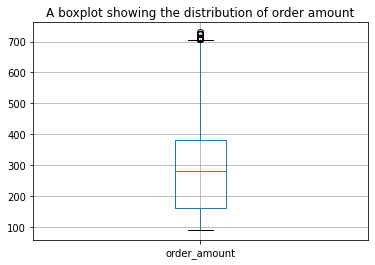

In [15]:
new_df.boxplot(column="order_amount")
plt.title("A boxplot showing the distribution of order amount")
plt.show()

Although there are visible outliers can be fixed but there is improvement in the appearence of the boxplot.

In [16]:
df_out = df[((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]
df_out.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,max_order_per_item
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
99,100,18,752,780,5,cash,2017-03-06 23:41:16,156.0
136,137,15,961,765,5,credit_card,2017-03-26 5:06:46,153.0


In [17]:
print("The rows left after removing outliers are:", new_df.shape[0])

The rows left after removing outliers are: 4831


### Question one (b)

What metric would you report for this dataset?

Looking at the analysis done earlier it is obvious that that the mean was affected by extreme values so it will be preferrable to use a measure of dispersion that isn't affected by extreme values. Therefore, I'll be using the median value.

### Question one (c) 

What is its value?

The median value of the original data is 284.

In [18]:
df["order_amount"].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

 while the median value for the truncated data is 280.

In [19]:
new_df["order_amount"].describe()

count    4831.000000
mean      292.430346
std       143.256683
min        90.000000
25%       162.000000
50%       280.000000
75%       380.000000
max       730.000000
Name: order_amount, dtype: float64

### Question two (a) SQL

How many orders were shipped by Speedy Express in total?

In [ ]:
SELECT count(*) 
FROM orders, shippers
where orders.shipperid = shippers.shipperid 
and shippers.shippername = "Speedy Express";

Output: 54

### Question two (b)

What is the last name of the employee with the most orders?

In [ ]:
SELECT employees.lastname, count(*) as count
from orders, employees
where orders.employeeid = employees.employeeid
group by orders.employeeid
order by count DESC

Output: Peacock with 40 orders

### Question two (c)

What product was ordered the most by customers in Germany?

In [ ]:
SELECT p.ProductID, p.ProductName, SUM(Quantity) AS TotalQuantity 
FROM Orders AS o, OrderDetails AS od, Customers AS c, Products AS p 
WHERE c.Country = "Germany" AND od.OrderID = o.OrderID 
AND od.ProductID = p.ProductID AND c.CustomerID = o.CustomerID 
GROUP BY p.ProductID 
ORDER BY TotalQuantity DESC 
LIMIT 1;

Output: Boston crab meat with 160 quantity